<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [146]:
import numpy as np 
import pandas as pd
import os

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing and Analysis

In [148]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [149]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'AAPL'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.135746,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.128593,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.319633,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.790077,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.634853,82271200


In [150]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [151]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,83.797731,84.758813,82.890789,83.870693,82.760469,1.241540e+08
std,40.314321,40.772319,39.851044,40.340961,40.702807,5.817803e+07
min,35.994999,36.430000,35.500000,35.547501,34.464802,4.100000e+07
25%,48.039999,48.582500,47.775000,48.165001,46.579662,8.457005e+07
50%,66.650002,67.500000,65.862503,66.730003,65.669632,1.093488e+08
75%,123.705002,125.080002,122.174999,123.645000,122.926983,1.462944e+08
max,181.119995,182.130005,178.529999,180.330002,180.100540,4.265100e+08


In [152]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

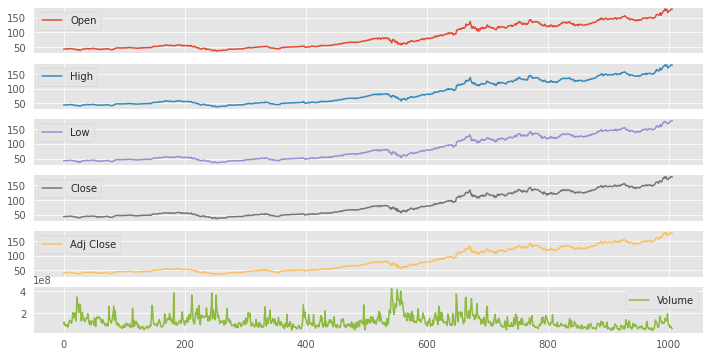

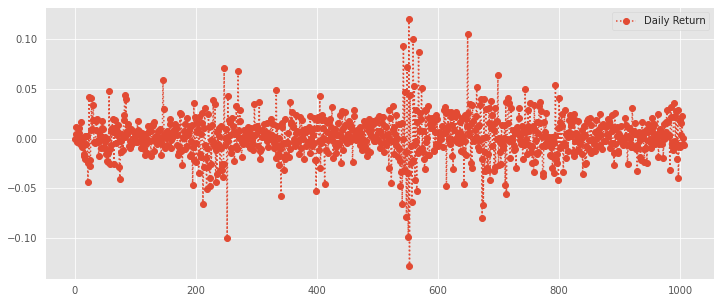

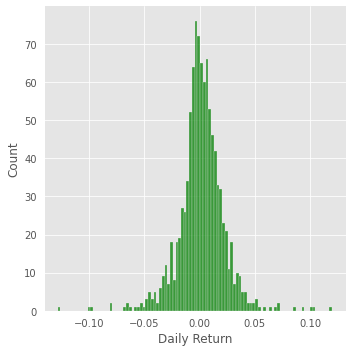

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


            Date        Open        High         Low       Close   Adj Close  \
0     2018-01-02   42.540001   43.075001   42.314999   43.064999   41.135746   
1     2018-01-03   43.132500   43.637501   42.990002   43.057499   41.128593   
2     2018-01-04   43.134998   43.367500   43.020000   43.257500   41.319633   
3     2018-01-05   43.360001   43.842499   43.262501   43.750000   41.790077   
4     2018-01-08   43.587502   43.902500   43.482498   43.587502   41.634853   
...          ...         ...         ...         ...         ...         ...   
1002  2021-12-23  175.850006  176.850006  175.270004  176.279999  176.055695   
1003  2021-12-27  177.089996  180.419998  177.070007  180.330002  180.100540   
1004  2021-12-28  180.160004  181.330002  178.529999  179.289993  179.061859   
1005  2021-12-29  179.330002  180.630005  178.139999  179.380005  179.151749   
1006  2021-12-30  179.470001  180.570007  178.089996  178.199997  177.973251   

         Volume  MA for 10 days  MA for

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

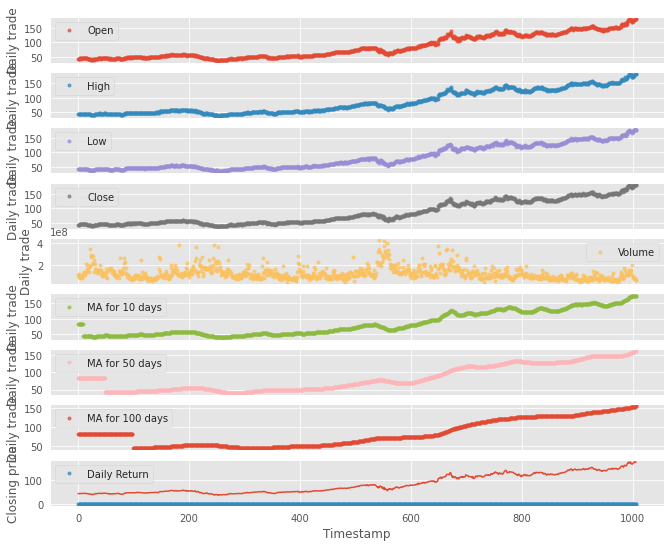

In [153]:
raw_data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

raw_data.shape
raw_data.size
raw_data.describe(include='all').T
raw_data.dtypes
raw_data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    raw_data[column_name]=pd.DataFrame.rolling(raw_data['Close'],ma).mean()

raw_data['Daily Return'] = raw_data['Close'].pct_change()
# plot the daily return percentage
raw_data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(raw_data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(raw_data['Date'])
closing_df1 = pd.DataFrame(raw_data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

raw_data.reset_index(drop=True, inplace=True)
raw_data.fillna(raw_data.mean(), inplace=True)
raw_data.head()

raw_data.nunique()

raw_data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = raw_data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(raw_data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = raw_data
print(df)

raw_data.isnull().sum()

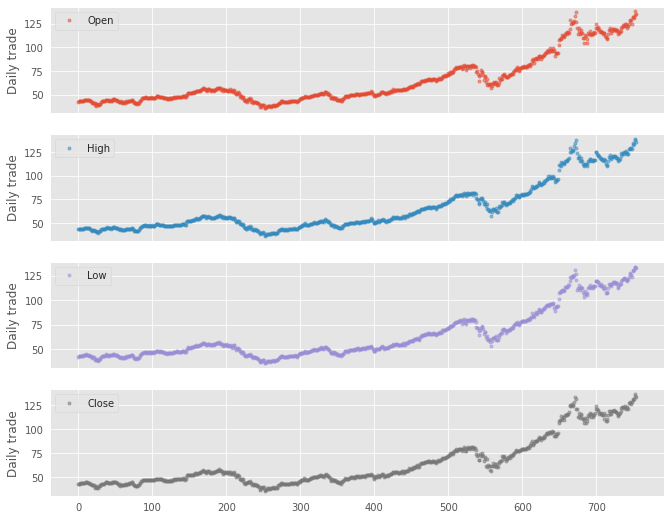

In [154]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date        Open        High         Low       Close   Adj Close  \
0     2018-01-02   42.540001   43.075001   42.314999   43.064999   41.135746   
1     2018-01-03   43.132500   43.637501   42.990002   43.057499   41.128593   
2     2018-01-04   43.134998   43.367500   43.020000   43.257500   41.319633   
3     2018-01-05   43.360001   43.842499   43.262501   43.750000   41.790077   
4     2018-01-08   43.587502   43.902500   43.482498   43.587502   41.634853   
...          ...         ...         ...         ...         ...         ...   
1002  2021-12-23  175.850006  176.850006  175.270004  176.279999  176.055695   
1003  2021-12-27  177.089996  180.419998  177.070007  180.330002  180.100540   
1004  2021-12-28  180.160004  181.330002  178.529999  179.289993  179.061859   
1005  2021-12-29  179.330002  180.630005  178.139999  179.380005  179.151749   
1006  2021-12-30  179.470001  180.570007  178.089996  178.199997  177.973251   

         Volume  MA for 10 days  MA for

,count,mean,std,min,25%,50%,75%,max
Open,1007.0,8.379773e+01,4.031432e+01,3.599500e+01,4.804000e+01,6.665000e+01,1.237050e+02,1.811200e+02
High,1007.0,8.475881e+01,4.077232e+01,3.643000e+01,4.858250e+01,6.750000e+01,1.250800e+02,1.821300e+02
Low,1007.0,8.289079e+01,3.985104e+01,3.550000e+01,4.777500e+01,6.586250e+01,1.221750e+02,1.785300e+02
Close,1007.0,8.387069e+01,4.034096e+01,3.554750e+01,4.816500e+01,6.673000e+01,1.236450e+02,1.803300e+02
Adj Close,1007.0,8.276047e+01,4.070281e+01,3.446480e+01,4.657966e+01,6.566963e+01,1.229270e+02,1.801005e+02
Volume,1007.0,1.241540e+08,5.817803e+07,4.100000e+07,8.457005e+07,1.093488e+08,1.462944e+08,4.265100e+08
MA for 10 days,1007.0,8.363088e+01,3.969860e+01,3.766350e+01,4.831475e+01,6.692075e+01,1.225970e+02,1.756360e+02
MA for 50 days,1007.0,8.277051e+01,3.723604e+01,4.022270e+01,4.879225e+01,7.078880e+01,1.208802e+02,1.615314e+02
MA for 100 days,1007.0,8.199089e+01,3.474251e+01,4.300483e+01,4.993128e+01,7.300917e+01,1.190254e+02,1.543202e+02
Daily Return,1007.0,1.627716e-03,2.071801e-02,-1.286470e-01,-7.740515e-03,1.560336e-03,1.224327e-02,1.198083e-01


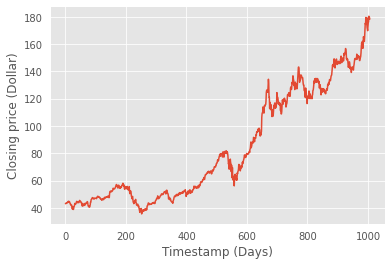

In [155]:
plt.plot(raw_data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = raw_data
print(df)

df.describe().transpose()

In [156]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split
df = data 
X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [157]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 11s 168ms/step - loss: 0.0576 - mse: 0.0576 - mae: 0.1783 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1132
Epoch 2/40
14/14 [==============================] - 0s 33ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.1130 - val_loss: 0.0172 - val_mse: 0.0172 - val_mae: 0.1028
Epoch 3/40
14/14 [==============================] - 0s 34ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0965 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0962
Epoch 4/40
14/14 [==============================] - 0s 33ms/step - loss: 0.0176 - mse: 0.0176 - mae: 0.0975 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0861
Epoch 5/40
14/14 [==============================] - 0s 33ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0836 - val_loss: 0.0115 - val_mse: 0.0115 - val_mae: 0.0839
Epoch 6/40
14/14 [==============================] - 1s 36ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0792 - val_loss: 0.0120 - val_mse: 0.0120 - val_mae: 0.0852
Epoch 7/40
14/14 [==

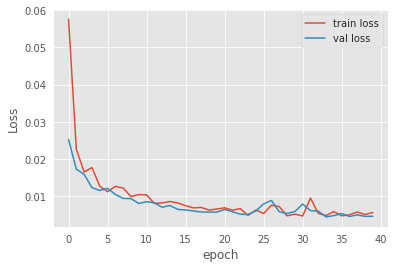

In [158]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

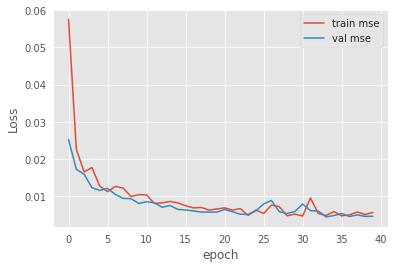

In [159]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

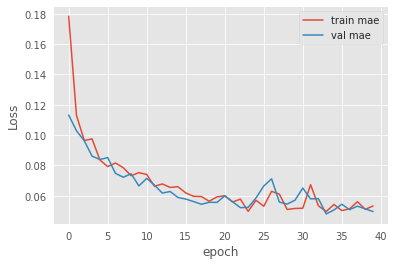

In [160]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [161]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0496


[0.004540441557765007, 0.004540441557765007, 0.04962417855858803]

In [162]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.927609
R2 Score: 0.927609
Max Error: 0.254112


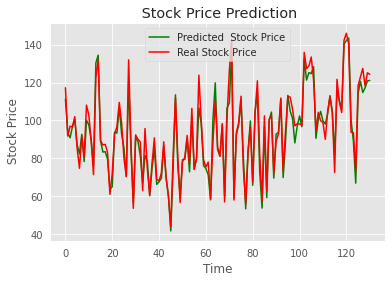

In [163]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [164]:
# First we need to save a model
model.save("model.h5")

In [165]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [166]:
df2 = raw_data[653:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
250


In [167]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0420


[0.0024859760887920856, 0.0024859760887920856, 0.042008232325315475]

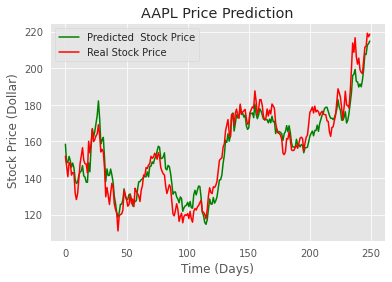

In [168]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()

In [169]:
pip install yfinance

In [170]:
import yfinance as yahooFinance
 
# in order to specify start date and
# end date we need datetime package
import datetime
 
# startDate , as per our convenience we can modify
startDate = datetime.datetime(2021, 1, 1)
 
# endDate , as per our convenience we can modify
endDate = datetime.datetime(2022, 3, 30)
GetAppleInformation = yahooFinance.Ticker("AAPL")


In [171]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
aapl = pdr.get_data_yahoo("AAPL", start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed


In [178]:
aapl= aapl.reset_index()
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453461,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664223,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073944,105158200
...,...,...,...,...,...,...,...
307,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
308,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400
309,2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200
310,2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900


In [184]:
df3 = aapl
X = []
Y = []
window_size=100
for i in range(1 , len(df3) - window_size -1 , 1):
    first = df3.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df3.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df3.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
208


In [185]:
model.evaluate(test_X, test_Y)

7/7 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0432


[0.0028622134122997522, 0.0028622134122997522, 0.04319563880562782]

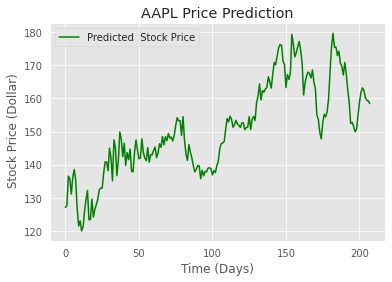

In [188]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df3.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(stock_name+' Price Prediction')
#plt.xticks(aapl.iloc[103:,0])
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()

In [207]:
predict = pd.DataFrame(aapl[104:], columns=['Date'])

In [208]:
predict['Close'] = predicted

In [211]:
predict = predict.set_index('Date')
predict

,Close
Date,
2021-06-03,127.096283
2021-06-04,127.558525
2021-06-07,136.528854
2021-06-08,135.722473
2021-06-09,131.116989
...,...
2022-03-23,162.418365
2022-03-24,160.234695
2022-03-25,159.447495


In [218]:
predict.loc['2021-06-03']

Close    127.096283
Name: 2021-06-03 00:00:00, dtype: float32